* Colab jupyter notebook끼리 import하기 위한 선언

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [3]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample')

In [4]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample']

* 가중치 매개변수의 최적값을 탐색하는 최적화방법
* 가중치 매개변수 초깃값, 하이퍼파라미터의 설정방법
* 드롭아웃 / 정규화 방법 / 배치 정규화

### 매개변수 갱신 
* 손실 함수의 값을 가능한 낮추는 것 : 최적화
* 기울어진 방향으로 매개변수 값을 갱신하는 일 : 확률적 경사 하강법(SGD)




##### 확률적 경사 하강법(SGD) :
* 단점 : y축 방향은 가파르지만, x축 방향은 완만함 / 탐색 경로가 비효율적

In [5]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

##### 모멘텀
* 특징 : 기울기 방향으로 가속되어서 학습시킴

In [6]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, value in parmas.items():
        self.v[key] = np.zeros_like(value)
      
    for key in prarms.keys():
      self.v[key] = self.momentum*v[key] - self.lr*grads[key]
      params[key] += self.v[key]

##### AdaGrad
* 특징 : 처음에는 크게 학습하다가 조금씩 작게 학습함 / 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행함 / 매개변수를 갱신할때 (1/(h)**0.5)을 곱해 학습률을 조정

In [7]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, value in parmas.items():
        self.h[key] = np.zeros_like(value)

    for key in prarms.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grad[key] / (np.sqrt(self.h[key]) + 1e-7)

##### Adam
* 모멘텀은 공이 바당을 구르는 긋함 움직임을 보임
* AdaGrad는 매개변수의 원소마다 적응으로 갱신 정도를 조정했음
* 특징 : 모멘텀 + AdaGrad


### 가충치의 초깃값
* 초깃값을 0으로 하면 (가중치를 균일한 값으로 설정), 올바르게 학습 불가 => 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문

###### 무작위로 생성한 입력데이터 가중치 매개변수

In [8]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [10]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

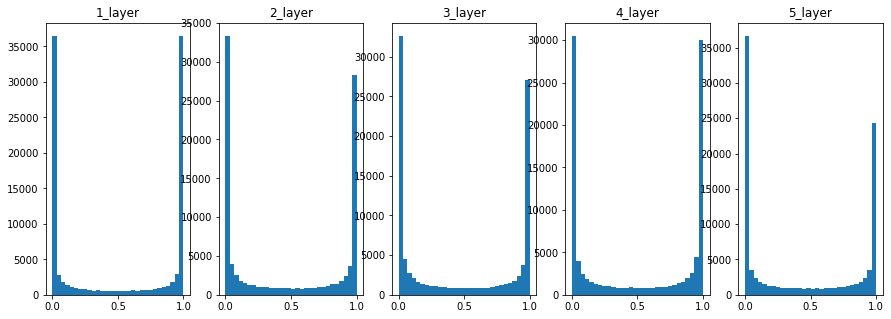

In [19]:
fig = plt.figure(figsize=(15,5))
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title("{}_layer".format(i+1))
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 각 활성화 값들이 0과 1에 치우쳐져있음. 시그모이드 함수는 그 출력이 0에 가까워지자 그 미분은 0 에 다가감
* 이런 상황엔 역전파의 기울이가 점점 작아지다가 사라짐 -> gradient vanishing

In [20]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

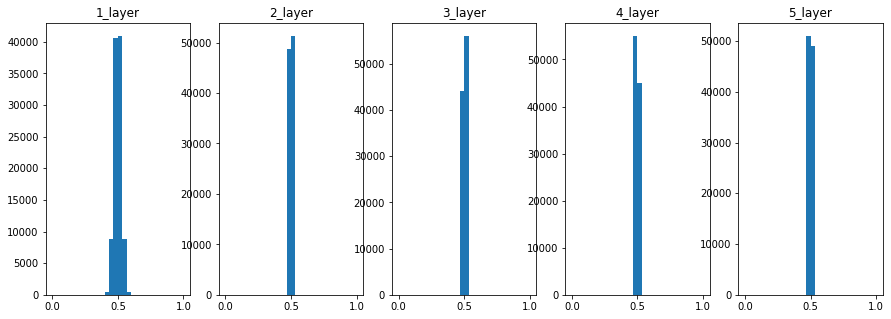

In [21]:
fig = plt.figure(figsize=(15,5))
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title("{}_layer".format(i+1))
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 표준편차를 0.01인 정규분포로 초기화 할때 각 층의 활성화값 분포 => 표현력을 제한함

###### Xavier 초깃값
* 앞 계층의 노드가 n개라면 표준편차가 1/sqrt(n)인 분포를 사용한다는 목적

In [22]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

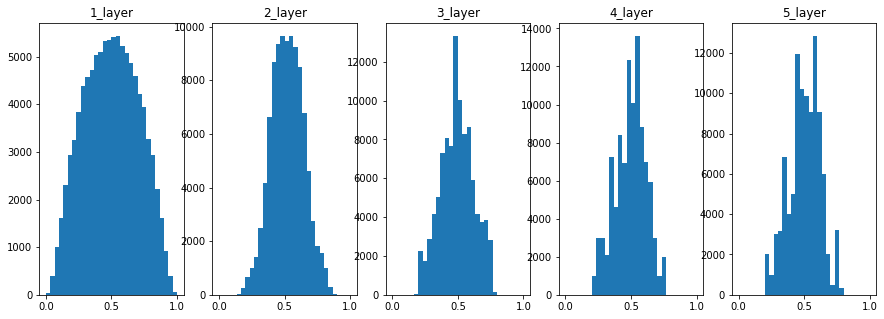

In [23]:
fig = plt.figure(figsize=(15,5))
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title("{}_layer".format(i+1))
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

###### He 초깃값
* Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과 (sigmoid / tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있음) 
* ReLU는 He초깃값을 사용 : 앞층 노드가 n개일때, 표준편차가 sqrt(2/n)인 정규분포 사용

### 배치 정규화
* 가중치의 초깃값을 적절히 설정하면, 각 층의 활성화 값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨
* 장점 : 학습을 빨리 진행 할 수 있음 / 초깃값에 크게 의존하지 않음 / 오버피팅을 억제함
* 특징 : 각 층에서 활성화 값이 적당히 분포되도록 조정 하는 것 (평균이 0, 분산이 1이 되도록)

### 오버피팅
* 오버피팅 일어나는 조건 : 매개변수가 많고 표현력이 높은 모델 / 훈련 데이터가 적은 경우

In [ ]:
# drop out
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None # 삭제할 뉴런을 False로 표시한다.
  
  def forward(self, x, train_flag=True):
    if train_flag:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    
    else:
      return x * (1.0 - self.dropout_ratio)
  
  def backward(slef, dout):
    return dout* self.mask